Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [75]:
startups=pd.read_csv("50_Startups.csv")
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [76]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [77]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [78]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#correlation Matrix

In [79]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#scatterplot

In [80]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [156]:
Startups=startups.rename({'R&D Spend':'RDS','Administration':'AS','Marketing Spend':'MS'},axis=1)
Startups

,RDS,AS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [157]:
Startups[Startups.duplicated()]

,RDS,AS,MS,State,Profit


In [158]:
Startups.describe()

,RDS,AS,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [160]:
#Build model
import statsmodels.formula.api as smf 
model=smf.ols("Profit~RDS+AS+MS",data=Startups).fit()

In [159]:
model.params

Intercept    50122.192990
RDS              0.805715
AS              -0.026816
MS               0.027228
dtype: float64

In [161]:
print(model.tvalues , np.round(model.pvalues,5))

Intercept     7.626218
RDS          17.846374
AS           -0.525507
MS            1.655077
dtype: float64 Intercept    0.00000
RDS          0.00000
AS           0.60176
MS           0.10472
dtype: float64


In [162]:
#R squared values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

# simple Linear regression Models

In [163]:
# Build SLR and MLR models for insignificant variables'AS' and 'MS'
# Also find their tvalues and pvalues
slr_a=smf.ols("Profit~AS",data=Startups).fit()
slr_a.tvalues , slr_a.pvalues  

(Intercept    3.040044
 AS           1.419493
 dtype: float64,
 Intercept    0.003824
 AS           0.162217
 dtype: float64)

In [164]:
mlr_m=smf.ols("Profit~MS",data=Startups).fit()
mlr_m.tvalues , mlr_m.pvalues  # varaibles have significant pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [165]:
mlr_am=smf.ols("Profit~AS+MS",data=Startups).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 AS           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AS           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

# Calculating VIF

In [166]:
rsq_RDS = smf.ols('RDS~AS+MS',data=Startups).fit().rsquared  
vif_RDS = 1/(1-rsq_RDS) # 16.33

rsq_AS= smf.ols('AS~RDS+MS',data=Startups).fit().rsquared  
vif_AS = 1/(1-rsq_AS) # 564.98

rsq_MS= smf.ols('MS~RDS+AS',data=Startups).fit().rsquared  
vif_MS = 1/(1-rsq_MS) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['RDS','AS','MS'],'VIF':[vif_RDS,vif_AS,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,AS,1.175091
2,MS,2.326773


# Residual Analysis

Test for Normality of Residuals Q-Q plot

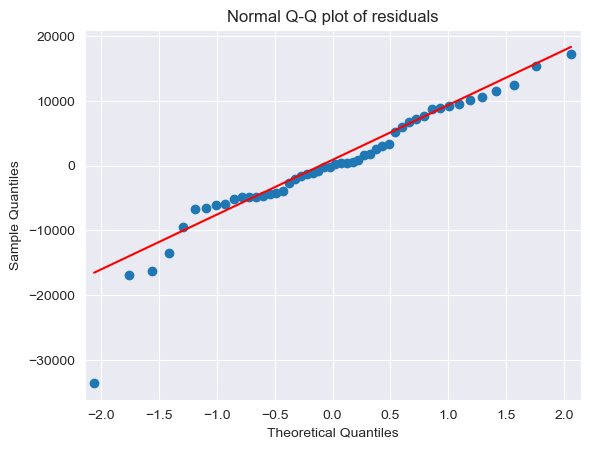

In [167]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [168]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

Residual plots for Homoscedascity

In [169]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

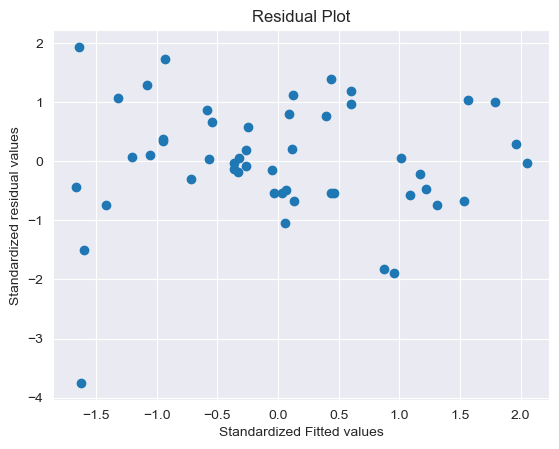

In [170]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residuals Vs Regression

eval_env: 1


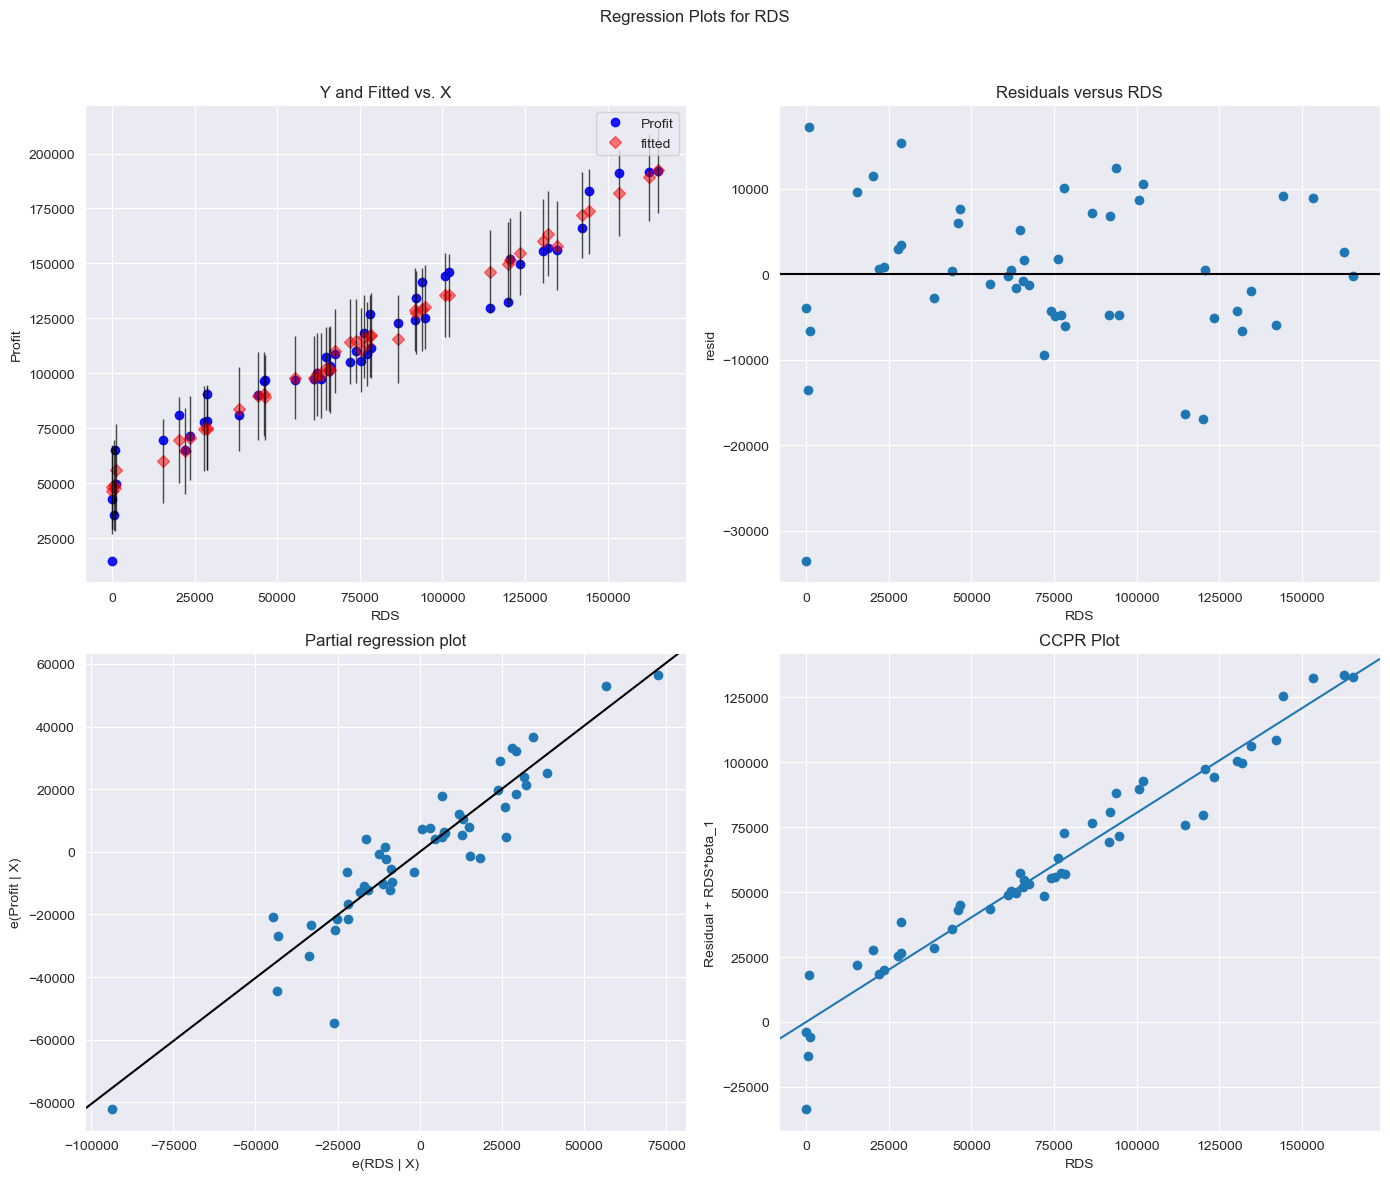

In [171]:
fig = plt.figure(figsize=(14,12))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


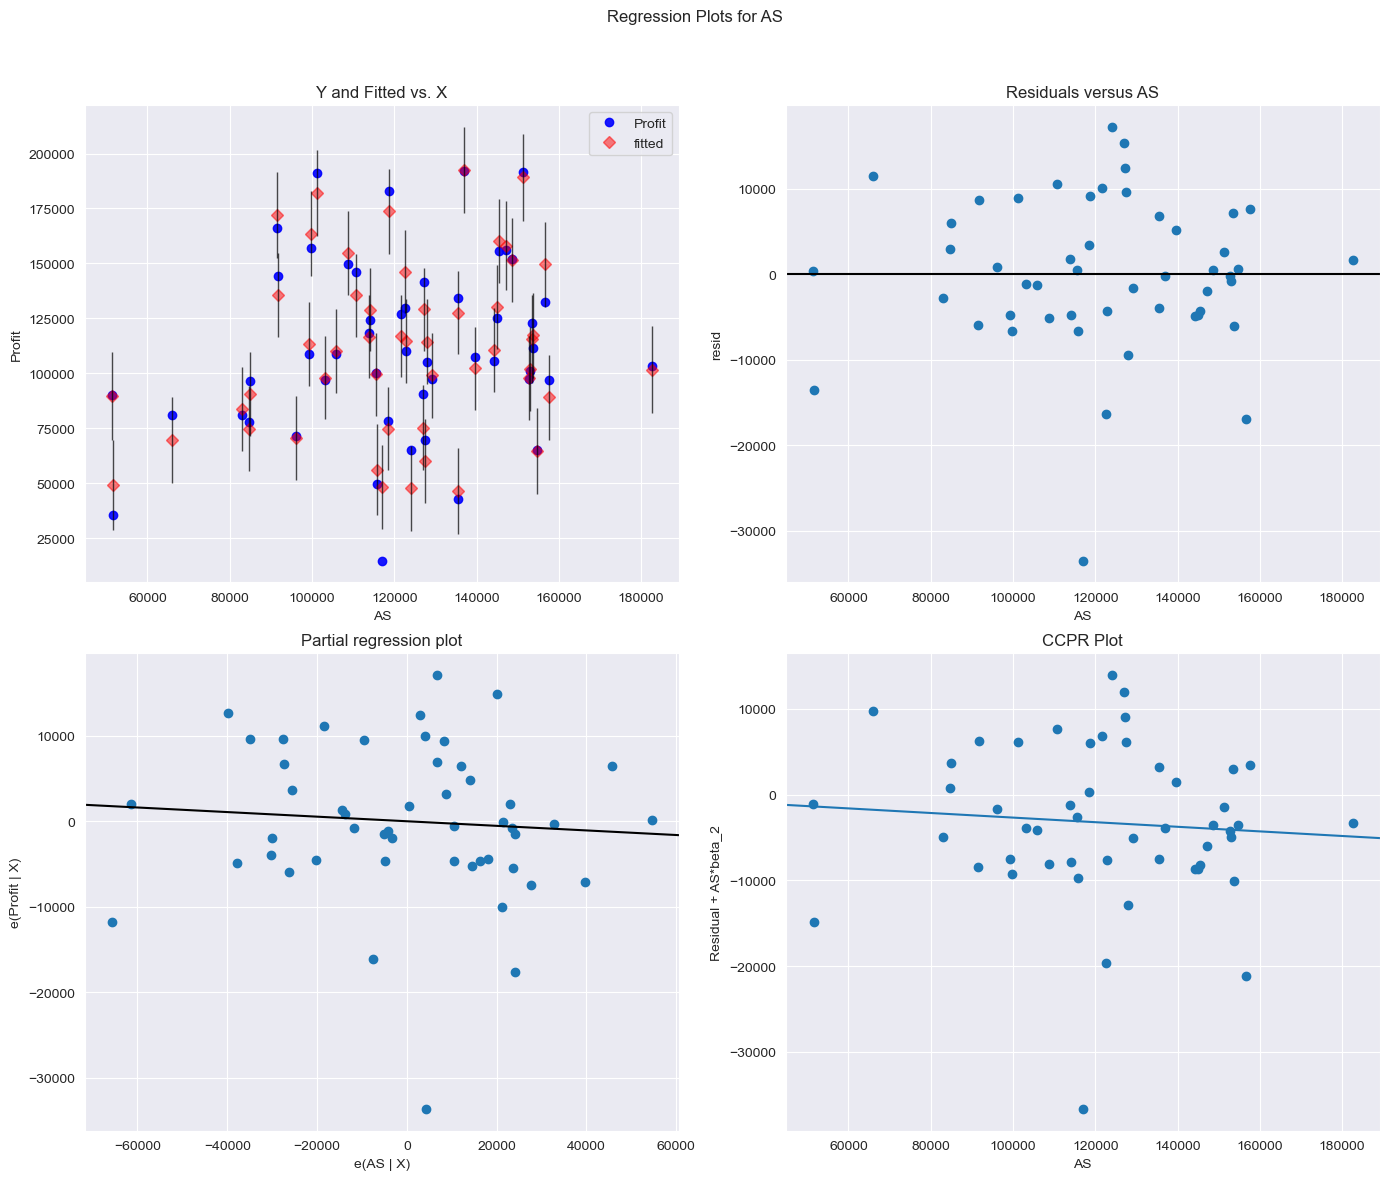

In [97]:
fig = plt.figure(figsize=(14,12))
fig = sm.graphics.plot_regress_exog(model, "AS", fig=fig)
plt.show()

eval_env: 1


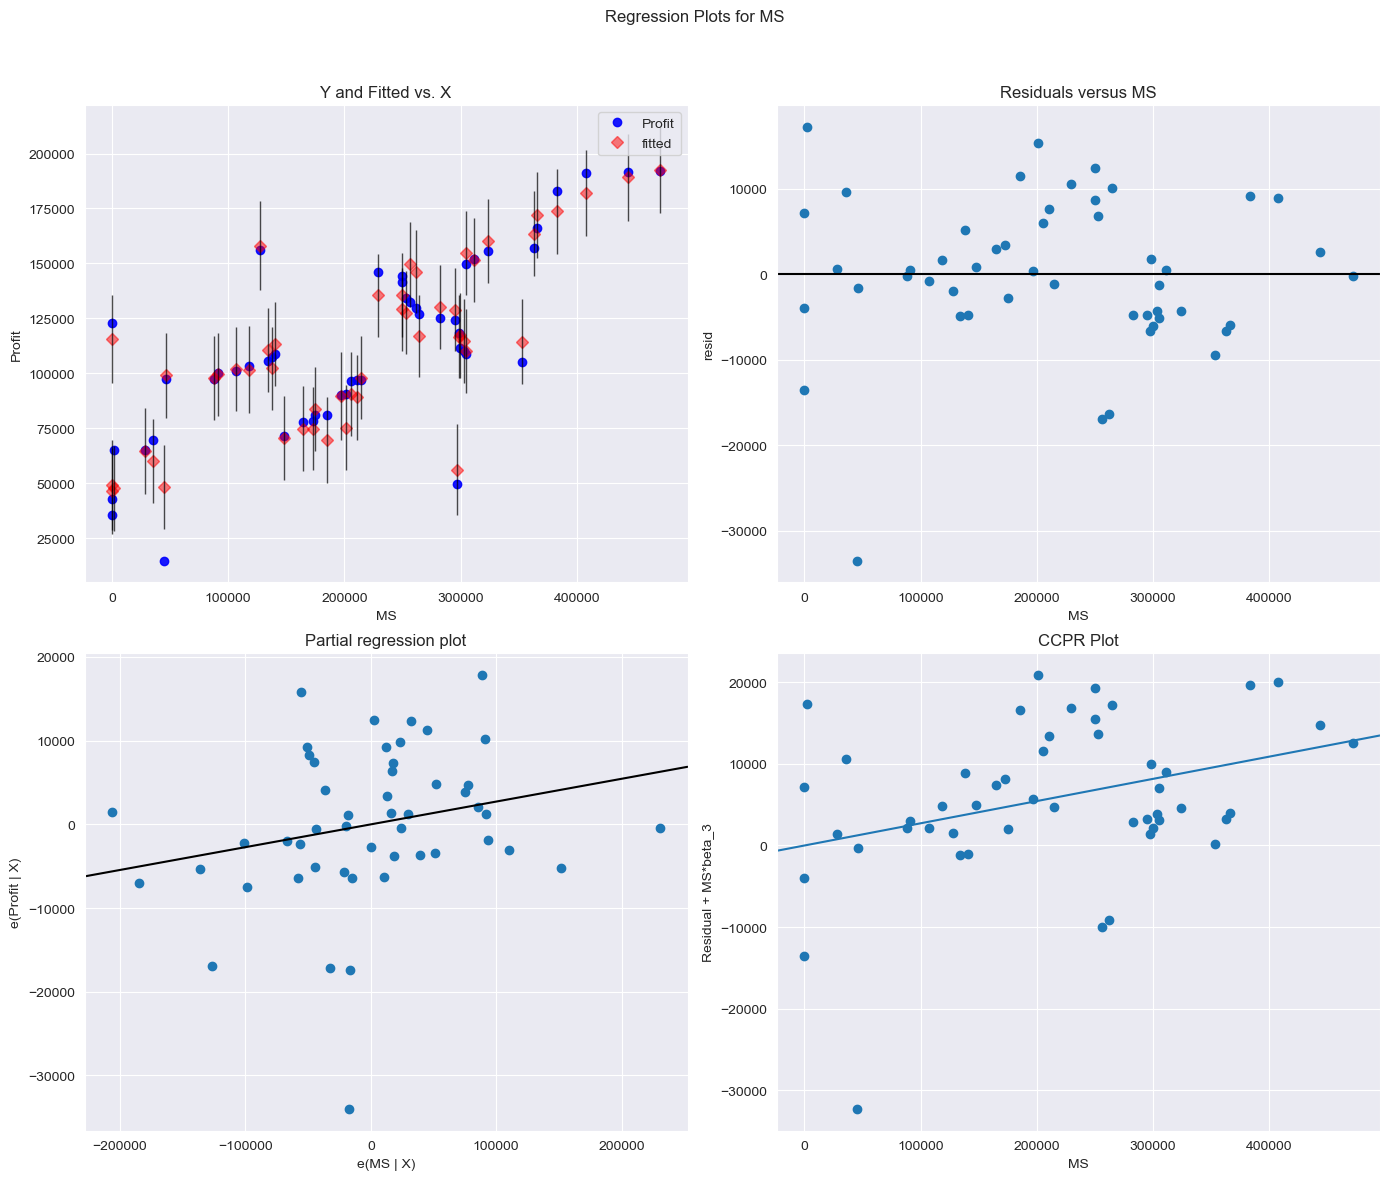

In [172]:
fig = plt.figure(figsize=(14,12))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

Detecting Influencers/outliers
Finding cooks Distance

In [173]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

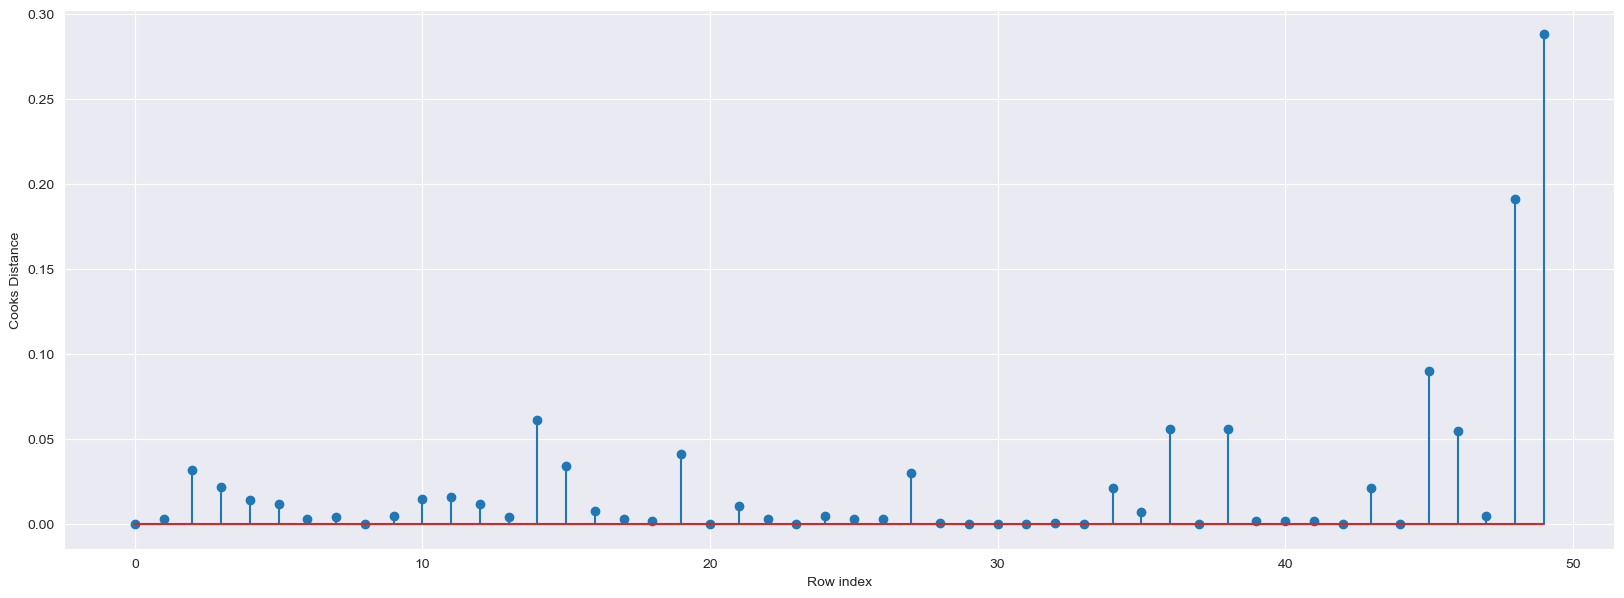

In [174]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [175]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [ ]:
# There are no data points greater than 0.5

# High Influence plot

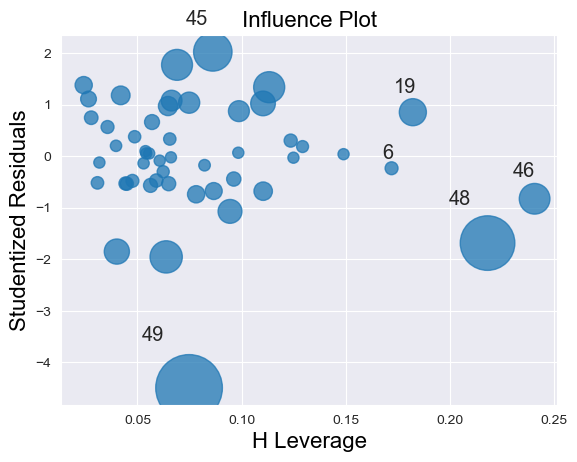

In [176]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [177]:
# k = no.of features/columns & n = no. of datapoints
k = Startups.shape[1]
n = Startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36

In [178]:
Startups[Startups.index.isin([49])]

,RDS,AS,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [179]:
Startups.head()

,RDS,AS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the Model

In [194]:
#Startups_new = pd.read_csv("50_startups.csv")
Startups1=Startups.copy()
Startups1

,RDS,AS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [195]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startups2=Startups1.drop(Startups1.index[49],axis=0).reset_index()
Startups2


,index,RDS,AS,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


# Buid Model

In [196]:
Final_Model = smf.ols('Profit~RDS+AS+MS',data=Startups2).fit()

In [197]:
Final_Model .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           8.85e-32
Time:                        23:54:54   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
AS            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Prediction

In [198]:
#New data for prediction
new_data=pd.DataFrame({'RDS':78000,'AS':127864.55,"MS":249839.44},index=[1])
new_data

,RDS,AS,MS
1,78000,127864.55,249839.44


In [200]:
# Manual prediction
Manualpred=Final_Model.predict(new_data)
print("Manual Prediction value is : ",Manualpred)

Manual Prediction value is :  1    116922.172202
dtype: float64


In [201]:
#Automatic Prediction 
autopred = Final_Model.predict(Startups2)
autopred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [207]:
d2={'Prepared_models':['Model','Final_Model'],'Rsquared':[model.rsquared,Final_Model.rsquared]}
table=pd.DataFrame(d2)
table

,Prepared_models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
